In [1]:
#libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [6]:
df = web.DataReader('ONGC.NS', data_source='yahoo',start='2020-01-01',end='2020-12-31')
#Show data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-01,128.899994,126.849998,128.750000,127.449997,2574894.0,118.642120
2020-01-02,128.649994,127.099998,127.650002,128.050003,4759843.0,119.200661
2020-01-03,133.399994,128.050003,131.000000,128.449997,31381588.0,119.573013
2020-01-06,129.800003,125.099998,129.699997,126.250000,14611204.0,117.525055
2020-01-07,127.699997,125.400002,125.599998,125.750000,7193304.0,117.059608
...,...,...,...,...,...,...
2020-12-28,95.150002,93.300003,94.000000,93.800003,17759262.0,93.800003
2020-12-29,94.650002,92.000000,94.199997,93.150002,17678810.0,93.150002
2020-12-30,94.500000,92.750000,93.500000,93.250000,15960705.0,93.250000


In [7]:
#Get Number rows and colums
df.shape

(251, 6)

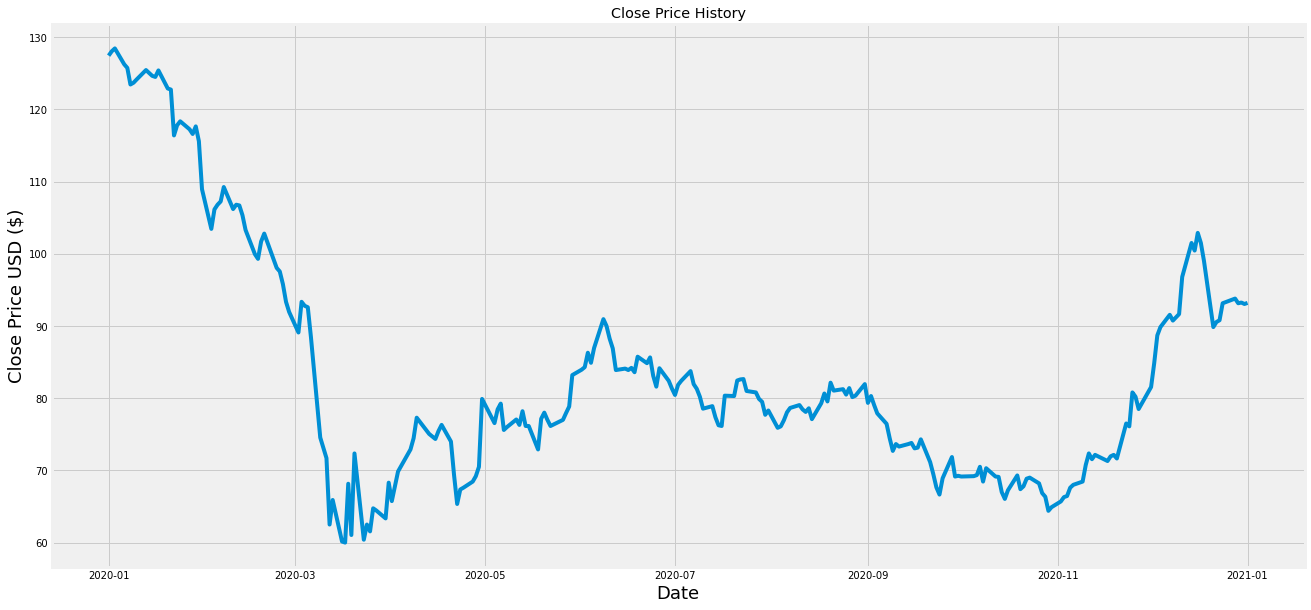

In [8]:
#Graph of closing price
plt.figure(figsize=(20,10))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [9]:
#Create data frame from close
data = df.filter(['Close'])
#dataframe to array
dataset = data.values
#Number of rows to train
training_data_len = math.ceil(len(dataset)* .8)
training_data_len

201

In [10]:
 #scale data
 scaler = MinMaxScaler(feature_range=(0,1))
 scaled_data = scaler.fit_transform(dataset)
 scaled_data

array([[0.9853908 ],
       [0.99415641],
       [1.        ],
       [0.96785979],
       [0.96055519],
       [0.92695398],
       [0.93060628],
       [0.93718049],
       [0.95617239],
       [0.95032879],
       [0.94448509],
       [0.94229369],
       [0.95544199],
       [0.91891898],
       [0.91672758],
       [0.82395915],
       [0.84441206],
       [0.85244706],
       [0.83637695],
       [0.82688095],
       [0.84222066],
       [0.81227175],
       [0.71512051],
       [0.63476989],
       [0.67421481],
       [0.68371081],
       [0.69028491],
       [0.71950332],
       [0.6749452 ],
       [0.68371081],
       [0.6822498 ],
       [0.6625274 ],
       [0.6325786 ],
       [0.58363767],
       [0.57414178],
       [0.60920378],
       [0.625274  ],
       [0.55588027],
       [0.54857567],
       [0.52300956],
       [0.48721695],
       [0.46676404],
       [0.42512783],
       [0.48721695],
       [0.47918195],
       [0.47626004],
       [0.41636233],
       [0.212

In [11]:
#train dataset
#scale train data set
train_data = scaled_data[0:training_data_len,:]
#split data in x and y
x_train =[]
y_train =[]

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.9853908 , 0.99415641, 1.        , 0.96785979, 0.96055519,
       0.92695398, 0.93060628, 0.93718049, 0.95617239, 0.95032879,
       0.94448509, 0.94229369, 0.95544199, 0.91891898, 0.91672758,
       0.82395915, 0.84441206, 0.85244706, 0.83637695, 0.82688095,
       0.84222066, 0.81227175, 0.71512051, 0.63476989, 0.67421481,
       0.68371081, 0.69028491, 0.71950332, 0.6749452 , 0.68371081,
       0.6822498 , 0.6625274 , 0.6325786 , 0.58363767, 0.57414178,
       0.60920378, 0.625274  , 0.55588027, 0.54857567, 0.52300956,
       0.48721695, 0.46676404, 0.42512783, 0.48721695, 0.47918195,
       0.47626004, 0.41636233, 0.21256397, 0.17092765, 0.03652301,
       0.08619433, 0.0021914 , 0.        , 0.11906504, 0.01533965,
       0.18042365, 0.0058437 , 0.03652301, 0.02264426, 0.06939372])]
[0.06501091521752744]

[array([0.9853908 , 0.99415641, 1.        , 0.96785979, 0.96055519,
       0.92695398, 0.93060628, 0.93718049, 0.95617239, 0.95032879,
       0.94448509, 0.94229369, 0.95

In [13]:
#convert x and y to array
x_train, y_train = np.array(x_train), np.array(y_train)

In [14]:
#reshape
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(141, 60, 1)

In [16]:
#LSTM model
model = Sequential()
model.add(LSTM(50 ,return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50 ,return_sequences=False))
model.add(Dense(12))
model.add(Dense(1))

In [17]:
#Compile 
model.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [19]:
#train
model.fit(x_train, y_train, batch_size=1, epochs=1)

141/141 [==============================] - 3s 22ms/step - loss: 0.0035


In [21]:
#test
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [22]:
#Conver data to array
x_test = np.array(x_test)

In [23]:
#reshape 2d to 3d
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [24]:
#Predicted price
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [25]:
#RMSE
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.9417120361328125

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


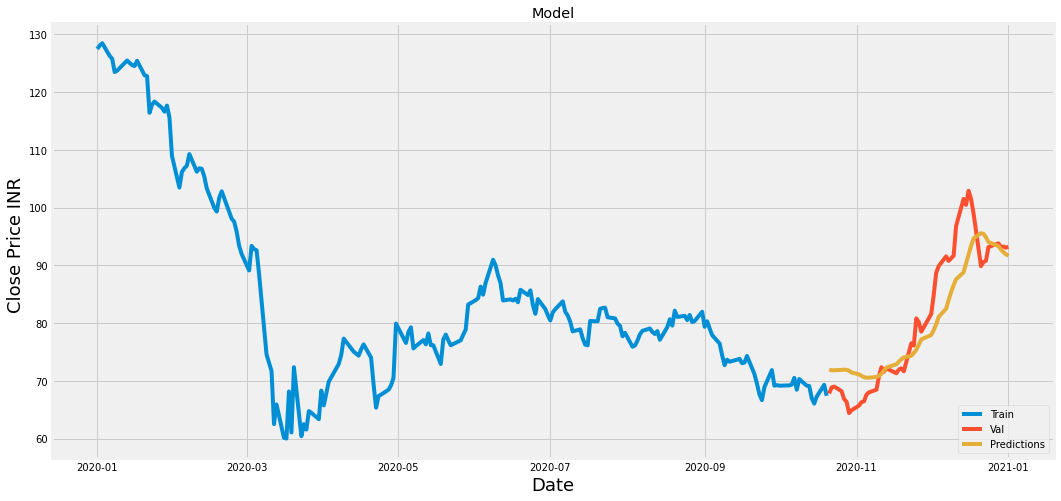

In [26]:
#plot
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price INR ', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val','Predictions'],loc = 'lower right')
plt.show()

In [27]:
#valid and predicted price
valid

,Close,Predictions
Date,,
2020-10-21,67.800003,71.909233
2020-10-22,68.849998,71.822449
2020-10-23,69.000000,71.823189
2020-10-26,68.199997,71.885246
2020-10-27,66.849998,71.929825
2020-10-28,66.349998,71.877480
2020-10-29,64.400002,71.741226
2020-10-30,64.900002,71.446274
2020-11-02,65.699997,71.112221


In [28]:
aq = web.DataReader('ONGC.NS', data_source='yahoo',start='2020-03-01',end='2020-07-04')
new_df = aq.filter(['Close'])
last_60_days = new_df[-60:].values 
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[82.67654]]


In [30]:
aq2 = web.DataReader('ONGC.NS', data_source='yahoo',start='2020-01-01',end='2020-12-31')
print(aq2['Close'])

Date
2020-01-01    127.449997
2020-01-02    128.050003
2020-01-03    128.449997
2020-01-06    126.250000
2020-01-07    125.750000
                 ...    
2020-12-28     93.800003
2020-12-29     93.150002
2020-12-30     93.250000
2020-12-31     93.050003
2021-01-01     93.199997
Name: Close, Length: 251, dtype: float64
